# Psychophysiology Processing


## Data collected using Acqknowldge and biopac MP150
## Data processed using Neurokit2 
### Data colelction and processing by Joel Larwood under the supervision of Dr Eric Vanman
### Collection sites
- Zygomaticus Major
- Corrugator Supercilli
- Electrodermal Activity

In [3]:
# Load NeuroKit and other useful packages
import neurokit2 as nk  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bioread
import os

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images

In [3]:
os.getcwd()

'/Users/joellarwood/Desktop/git/alexithymia_physiology_2019/data_cleaning'

In [54]:
# Test data on participant one 

data, sampling_rate = nk.read_acqknowledge("/Volumes/NO NAME/physiology/raw_acq_files/001.acq", 1000) # reads in acknowledge file 


In [6]:
pd.DataFrame(data)

,Zygomaticus,Oculi,Corrugator,Skin conductance,Digital input,d9*2,d10*4,d11*8,d12*16,d8+d9*2,C4+d10*4,C5+d11*8,c6+d12*16,d13*32,c7+c8,d14*64,c9+c19,Zygo Integrated,Corr Integrated,ubermark
0,-2.868652,8.666992,3.723145,9.270630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057373,0.074463,0.0
1,-0.244141,9.155273,3.417969,9.270630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062256,0.142822,0.0
2,-0.915527,5.615234,2.075195,9.272461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080566,0.184326,0.0
3,0.427246,6.469727,-1.525879,9.271240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089111,0.214844,0.0
4,-2.197266,7.629395,-0.732422,9.270020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133057,0.229492,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367073,-1.647949,6.408691,-5.920410,11.771240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.296143,6.182861,0.0
2367074,-2.319336,10.803223,-8.361816,11.771851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.296143,6.179199,0.0
2367075,-2.014160,14.099121,-0.427246,11.771240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.275391,5.997314,0.0
2367076,-2.197266,9.277344,5.676270,11.771851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.272949,6.110840,0.0


In [55]:
# Find the events

events = nk.events_find(data["ubermark"], threshold_keep = 'above')
events

{'onset': array([      0,  114166,  188394,  279167,  363178,  444084,  524487,
         595061,  669332,  738890,  811576,  878621,  952648, 1020522,
        1091455, 1160830, 1227162, 1295525, 1365775, 1435275, 1502581,
        1584028, 1655800, 1732305, 1799530]),
 'duration': array([45748, 30018, 30007, 30026, 30020, 30020, 30021, 30021, 30006,
        30004, 30012, 30020, 30016, 30007, 30022, 30021, 30006, 30023,
        30013, 30020, 30021, 30008, 30014, 30007,   558]),
 'label': array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25'], dtype='<U21')}

# Skin Conductance Analysis

In [9]:
# process EDA

eda, eda_info = nk.eda_process(data["Skin conductance"], sampling_rate = 1000)


In [10]:
pd.DataFrame(eda)

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,9.270630,9.268308,9.189832,0.078476,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9.270630,9.268252,9.189815,0.078437,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9.272461,9.268196,9.189799,0.078397,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9.271240,9.268139,9.189782,0.078357,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.270020,9.268082,9.189766,0.078316,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2367073,11.771240,11.781994,11.423017,0.001069,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2367074,11.771851,11.781994,11.423017,0.000986,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2367075,11.771240,11.781994,11.423017,0.000904,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2367076,11.771851,11.781994,11.423017,0.000822,0.0,0.0,0.0,0.0,0.0,0.0,0.0


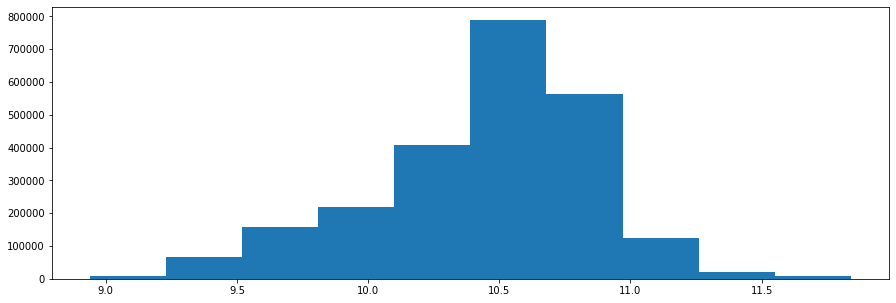

In [56]:
eda_hist = plt.hist(eda["EDA_Clean"])

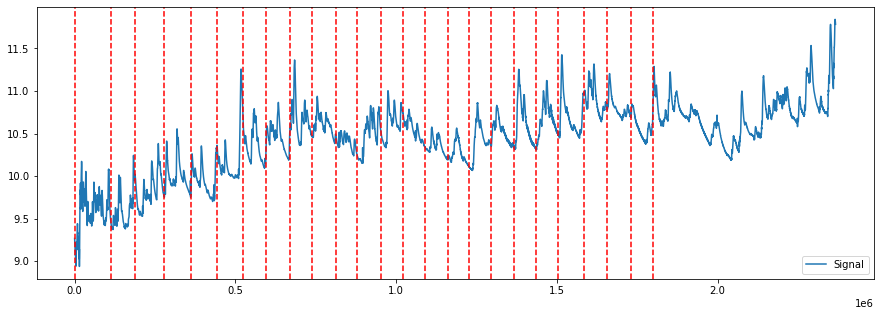

In [57]:
eda_plot = nk.events_plot(events, eda["EDA_Clean"])

## Epoch Processing

In [58]:
eda_epoch = nk.epochs_create(eda, events, sampling_rate = 1000, epochs_start = -30, epochs_end = 30)

In [59]:
eda_tonic = {}

for epoch_index in eda_epoch:
    eda_tonic[epoch_index] ={}
    
    epoch = eda_epoch[epoch_index]
    
    tonic_baseline = epoch["EDA_Tonic"].loc[-30000:0].mean() #mean of 30sec baseline period
    tonic_mean = epoch["EDA_Tonic"].loc[0:30000].mean() # mean of trial period
    eda_tonic[epoch_index]["SCL"] = tonic_mean - tonic_baseline
    
eda_tonic = pd.DataFrame.from_dict(eda_tonic)
    

In [60]:
eda_tonic

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
SCL,NaN,-0.041994,0.012593,0.018111,0.103895,0.28355,0.025875,0.2369,0.407019,0.010414,...,-0.014178,0.157378,0.217539,0.352863,0.19575,0.177908,0.422633,0.159942,-0.097352,0.303186


# Process Zygomaticus

In [73]:
zyg, zyg_info = nk.emg_process(data["Zygomaticus"], sampling_rate = 1000)

In [74]:
pd.DataFrame(zyg)

,EMG_Raw,EMG_Clean,EMG_Amplitude,EMG_Activity,EMG_Onsets,EMG_Offsets
0,-5.065918,0.005983,-0.745170,0.0,0.0,0.0
1,-1.525879,2.202830,-0.549454,0.0,0.0,0.0
2,2.258301,4.892003,-0.355465,0.0,0.0,0.0
3,-1.892090,0.047068,-0.163710,0.0,0.0,0.0
4,-5.615234,-3.960700,0.025375,0.0,0.0,0.0
...,...,...,...,...,...,...
1800083,-2.319336,-0.581994,1.288821,0.0,0.0,0.0
1800084,-2.929688,-0.990150,1.286245,0.0,0.0,0.0
1800085,-1.159668,1.178816,1.283815,0.0,0.0,0.0
1800086,-2.685547,0.211166,1.281569,0.0,0.0,0.0


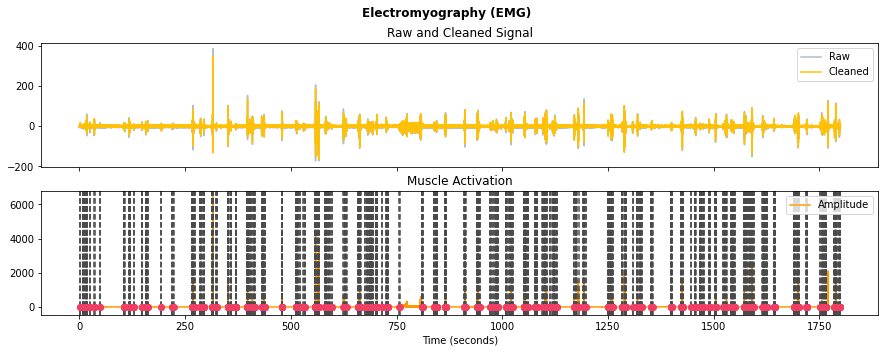

In [75]:
zyg_plt = nk.emg_plot(zyg, sampling_rate = 1000)

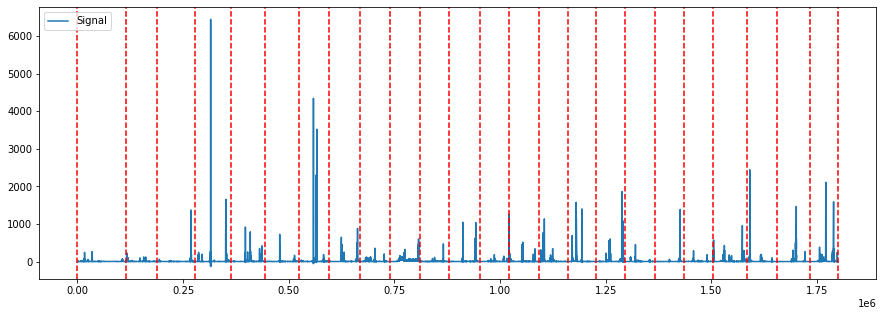

In [76]:
zyg_plot = nk.events_plot(events, zyg["EMG_Amplitude"])

In [77]:
zyg_epoch = nk.epochs_create(zyg, events, sampling_rate = 1000, epochs_start = -30, epochs_end = 30)

In [71]:
zyg = {}

for epoch_index in zyg_epoch:
    zyg[epoch_index] ={}
    
    epoch = zyg_epoch[epoch_index]
    
    zyg_baseline = epoch["EMG_Amplitude"].loc[-30000:0].mean() #mean of 30sec baseline period
    zyg_mean = epoch["EMG_Amplitude"].loc[0:30000].mean() # mean of trial period
    zyg[epoch_index]["zyg"] = zyg_mean - zyg_baseline
    
zyg = pd.DataFrame.from_dict(zyg)

KeyError: 'EMG_Amplitude'

In [67]:
zyg

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
zyg,NaN,2.852215,-1.531865,-4.784841,-15.166559,-9.492322,-3.856994,-39.10797,-6.275931,18.351561,...,35.866079,3.231928,-35.04219,-0.573815,-14.124494,15.395716,8.932711,-1.357977,5.177077,-43.855356


# Process Corugator

In [ ]:
cor, cor_info = nk.emg_process(data["Corrugator"], sampling_rate = 1000)

In [26]:
pd.DataFrame(cor)

,EMG_Raw,EMG_Clean,EMG_Amplitude,EMG_Activity,EMG_Onsets,EMG_Offsets
0,3.723145,-0.029501,2.335836,0.0,0.0,0.0
1,3.417969,1.159158,2.392447,0.0,0.0,0.0
2,2.075195,1.123095,2.449804,0.0,0.0,0.0
3,-1.525879,-1.522642,2.507783,0.0,0.0,0.0
4,-0.732422,-0.220579,2.566253,0.0,0.0,0.0
...,...,...,...,...,...,...
2367073,-5.920410,-4.267528,35.472833,0.0,0.0,0.0
2367074,-8.361816,-5.868838,35.369268,0.0,0.0,0.0
2367075,-0.427246,1.547220,35.276508,0.0,0.0,0.0
2367076,5.676270,5.831092,35.194809,0.0,0.0,0.0


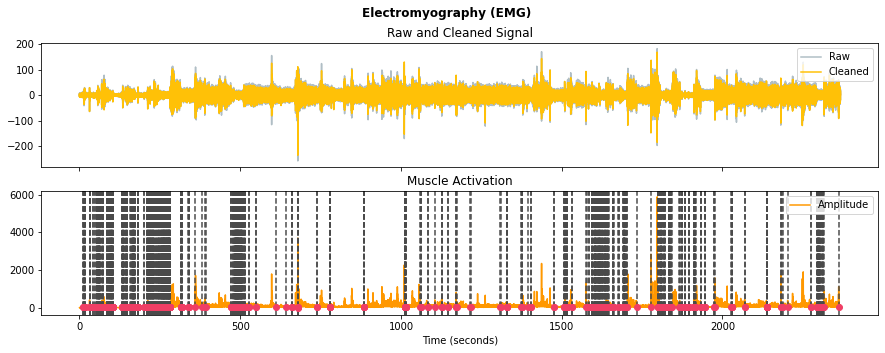

In [33]:
cor_plt = nk.emg_plot(cor, sampling_rate = 1000)

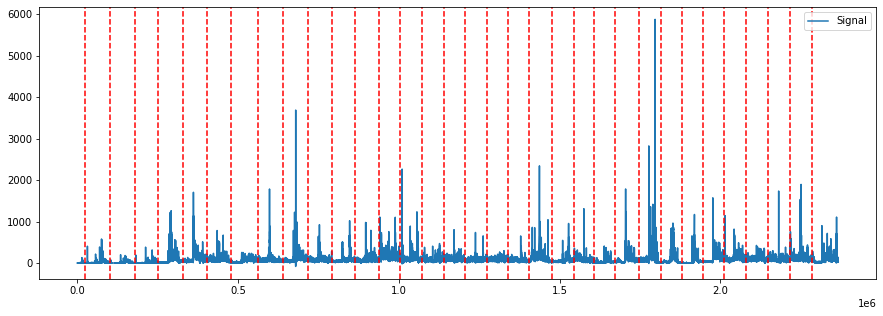

In [34]:
cor_plot = nk.events_plot(events, cor["EMG_Amplitude"])